In [89]:
%pip install coppeliasim-zmqremoteapi-client  simple-pid

Note: you may need to restart the kernel to use updated packages.


In [90]:
from ultralytics import YOLO
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import numpy as np
from matplotlib import pyplot as plt

import cv2

from simple_pid import PID

In [59]:
model = YOLO('yolov8n-seg.pt') 

100%|██████████| 6.74M/6.74M [00:00<00:00, 7.26MB/s]


In [91]:
kp = 0.01
ki= 0.0001
kd = 0.01

In [3]:
client = RemoteAPIClient()

In [4]:
sim = client.require('sim')

In [95]:
camHandle = sim.getObject('./rgb')
motorLeft=sim.getObject("./leftMotor")
motorRight=sim.getObject("./rightMotor")

In [63]:
sim.startSimulation()

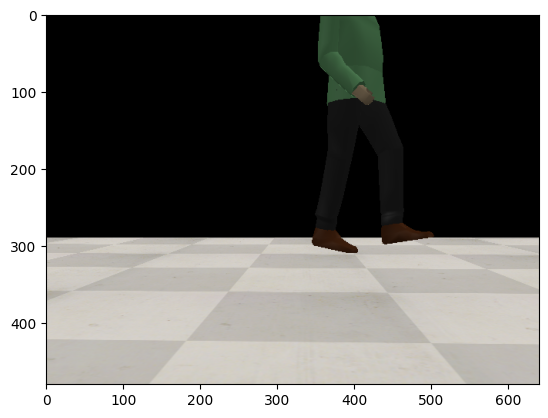

In [66]:
img_byte, [resX, resY] = sim.getVisionSensorImg(camHandle)
img_array = np.frombuffer(img_byte, dtype=np.uint8).reshape((resY, resX, 3))

img_array = cv2.flip(img_array,0)

plt.imshow(img_array)

In [67]:
results = model(img_array)


0: 480x640 1 person, 97.2ms
Speed: 3.3ms preprocess, 97.2ms inference, 9.3ms postprocess per image at shape (1, 3, 480, 640)


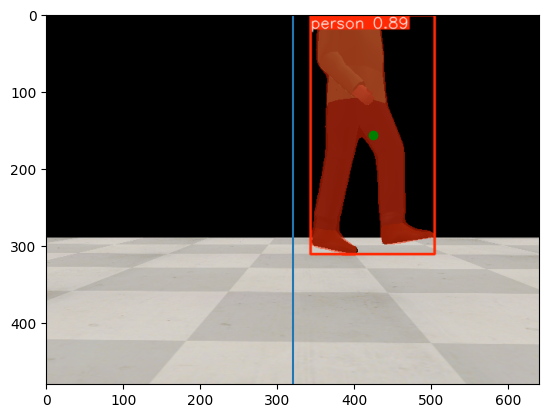

In [87]:
img_ = results[0].plot()

box = results[0].boxes.xyxy.numpy()[0]
cx = (box[0] + box[2])/2
cy = (box[1] + box[3])/2

plt.plot(cx, cy, 'go')

results[0].boxes.xyxy

plt.axvline(resX/2)
plt.imshow(img_)

In [92]:
pid = PID(kp, ki, kd, setpoint=resX/2)

In [93]:
ctrl = pid(cx)
ctrl

-129.59616793212945

In [ ]:
sim.setJointTargetVelocity(motorLeft,vLeft)
sim.setJointTargetVelocity(motorRight,vRight)

In [88]:
err = cx - resX/2
err

103.9346923828125

In [72]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8942])
data: tensor([[343.4877,   1.4783, 504.3817, 311.2627,   0.8942,   0.0000]])
id: None
is_track: False
orig_shape: (480, 640)
shape: torch.Size([1, 6])
xywh: tensor([[423.9347, 156.3705, 160.8939, 309.7844]])
xywhn: tensor([[0.6624, 0.3258, 0.2514, 0.6454]])
xyxy: tensor([[343.4877,   1.4783, 504.3817, 311.2627]])
xyxyn: tensor([[0.5367, 0.0031, 0.7881, 0.6485]])

(4,)

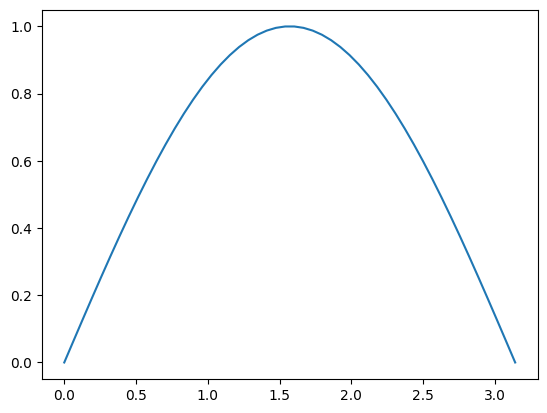

In [75]:
theta  = np.linspace(0, np.pi)
sin = np.sin(theta)

plt.plot(theta, sin)

In [69]:
sim.stopSimulation()

In [ ]:
model = YOLO('yolov8n-seg.pt') 